# EDA on students score dataset and prediction of scores by training a linear regression model
## Loading the libraries

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error , root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Loading the dataset

In [3]:
filepath = "D:\\Datasets\\Student performance dataset\\StudentPerformanceFactors.csv"

df = pd.read_csv(filepath)

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.describe(include=['object'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Here we can see that data has no null values.

## Visualizing relationships

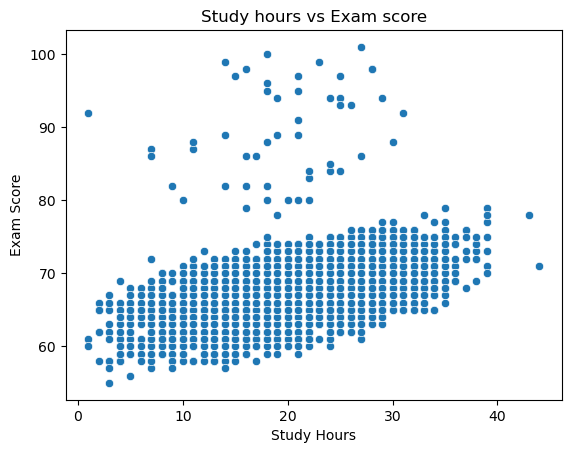

In [8]:
plt.Figure(figsize=(8,6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.ylabel("Exam Score")
plt.xlabel("Study Hours")
plt.title("Study hours vs Exam score")
plt.show()

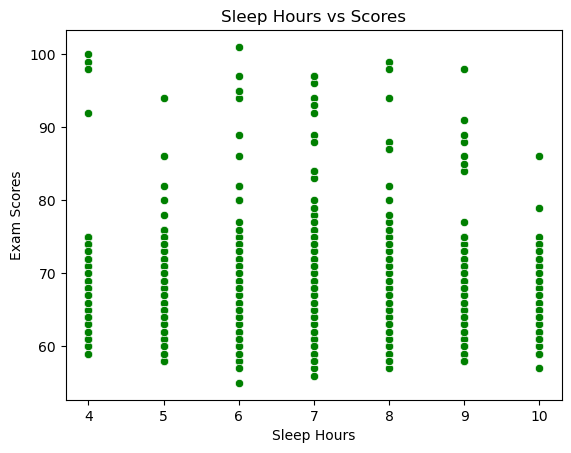

In [9]:
plt.Figure(figsize=(7,6))
sns.scatterplot(x='Sleep_Hours' , y='Exam_Score' , data=df , color="Green" )
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Scores')
plt.title("Sleep Hours vs Scores")
plt.show()

C:\Users\Talha\AppData\Local\Temp\ipykernel_8984\3433000631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Exam_Score', data=df, palette='coolwarm')


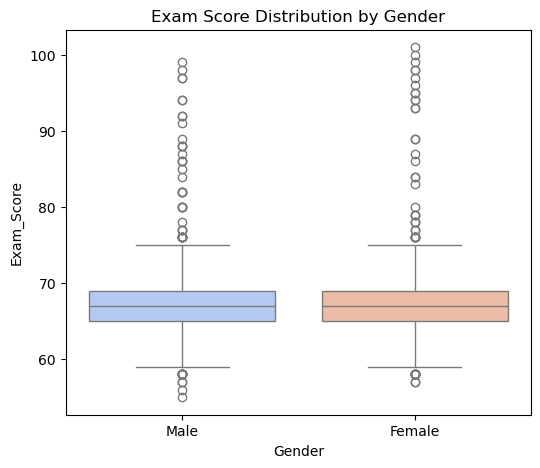

In [10]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Exam_Score', data=df, palette='coolwarm')
plt.title('Exam Score Distribution by Gender')
plt.show()


C:\Users\Talha\AppData\Local\Temp\ipykernel_8984\3514258927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, palette='viridis')


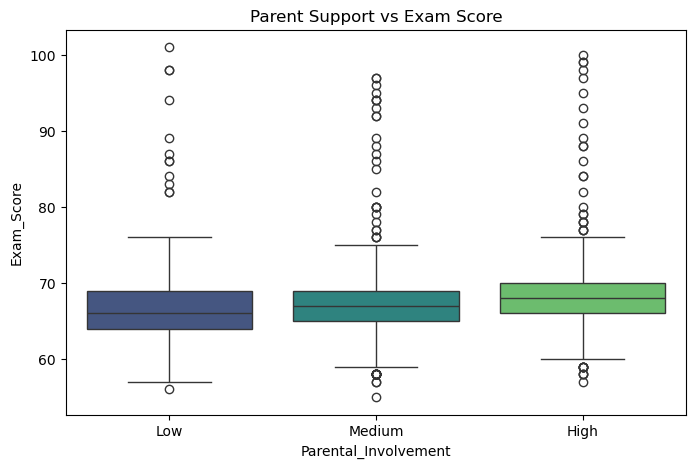

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, palette='viridis')
plt.title('Parent Support vs Exam Score')
plt.show()


C:\Users\Talha\AppData\Local\Temp\ipykernel_8984\4110391960.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Motivation_Level', y='Exam_Score', data=df, ci=None, palette='mako')
C:\Users\Talha\AppData\Local\Temp\ipykernel_8984\4110391960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Motivation_Level', y='Exam_Score', data=df, ci=None, palette='mako')


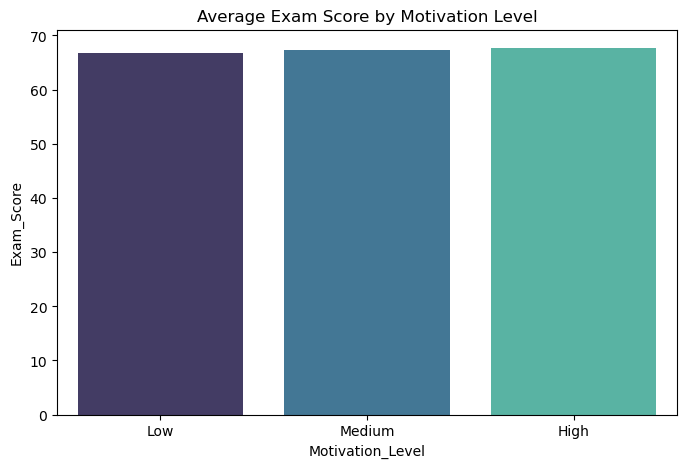

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Motivation_Level', y='Exam_Score', data=df, ci=None, palette='mako')
plt.title('Average Exam Score by Motivation Level')
plt.show()


In [5]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

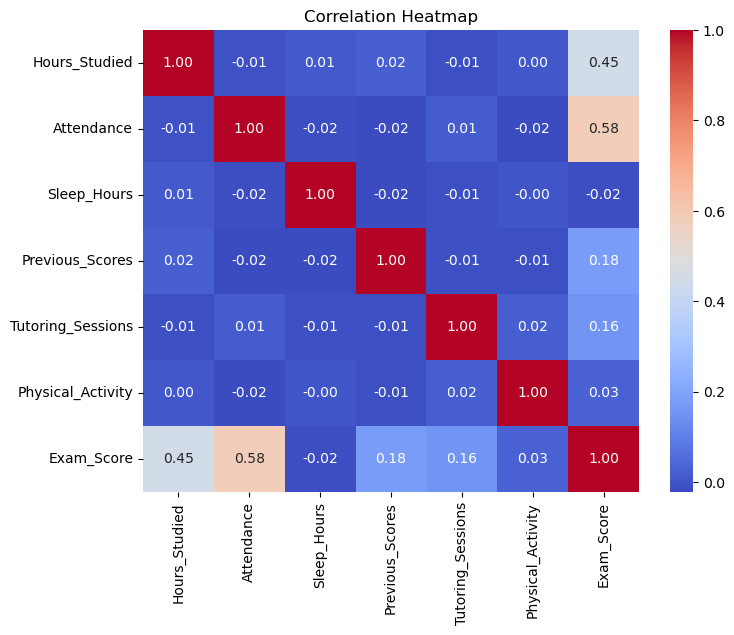

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


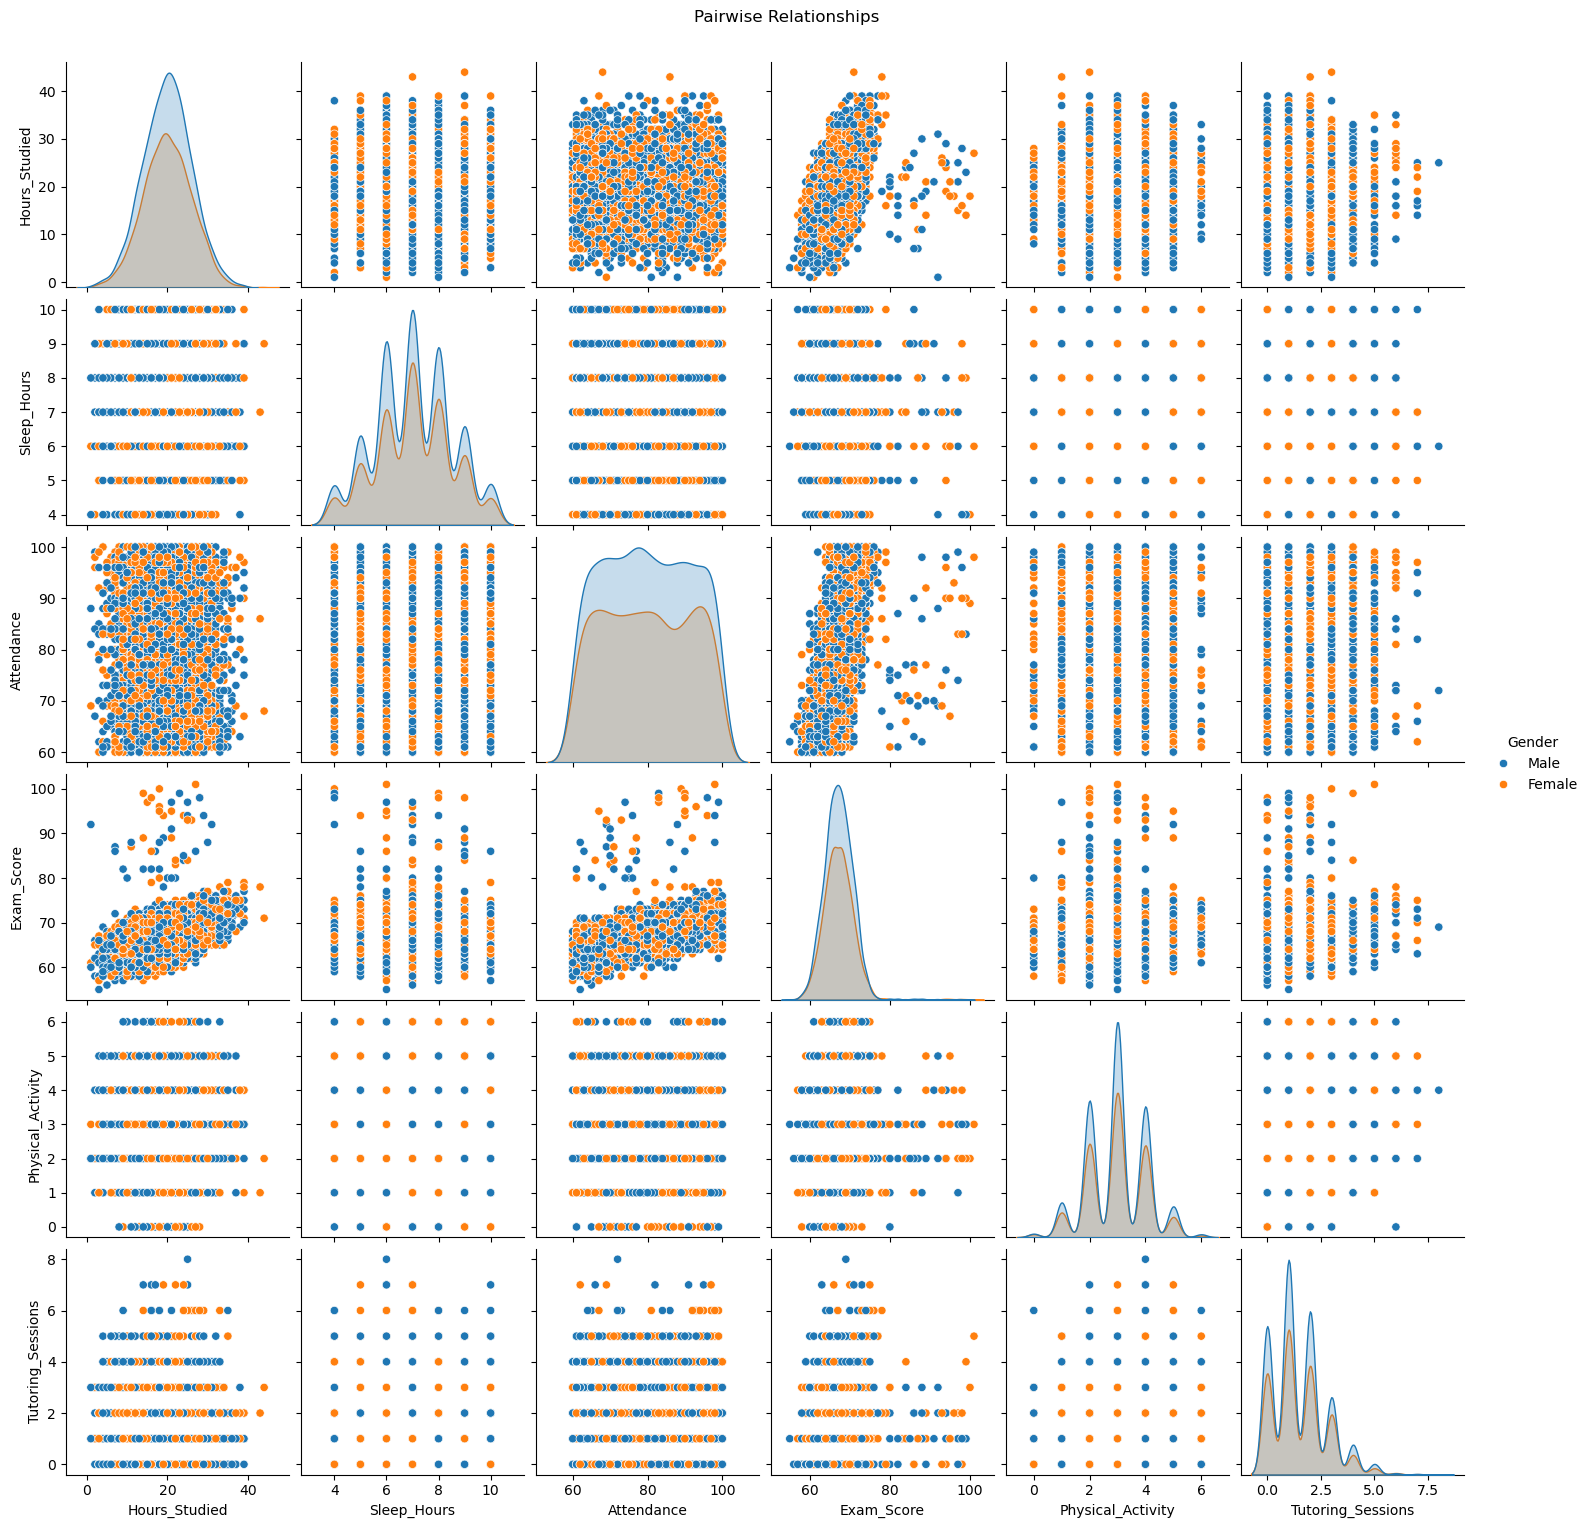

In [15]:
sns.pairplot(df, vars=['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Exam_Score' , 'Physical_Activity' , 'Tutoring_Sessions'], hue='Gender')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


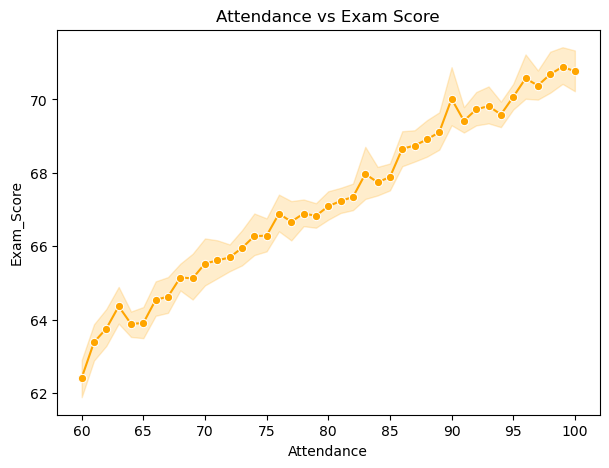

In [16]:
plt.figure(figsize=(7,5))
sns.lineplot(x='Attendance', y='Exam_Score', data=df, marker='o', color='orange')
plt.title('Attendance vs Exam Score')
plt.show()


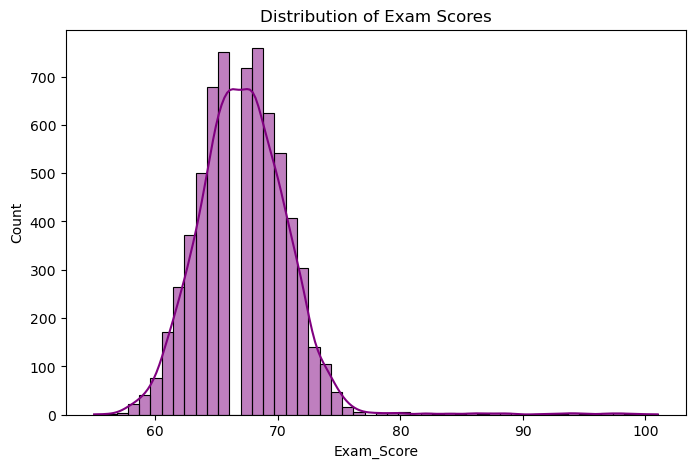

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], kde=True, color='purple', bins=50)
plt.title('Distribution of Exam Scores')
plt.show()


In [18]:
fig = px.pie(
    df,
    names='Motivation_Level',
    title='Student Motivation Levels',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hole=0.3  # donut chart style
)
fig.update_traces(textinfo='percent+label', pull=[0.05]*len(df['Motivation_Level'].unique()))
fig.show()


In [19]:
fig = px.box(
    df,
    x='Gender',
    y='Exam_Score',
    color='Gender',
    title='Exam Score Distribution by Gender',
    color_discrete_sequence=px.colors.qualitative.Set2,
)
fig.update_layout(template='plotly_white')
fig.show()


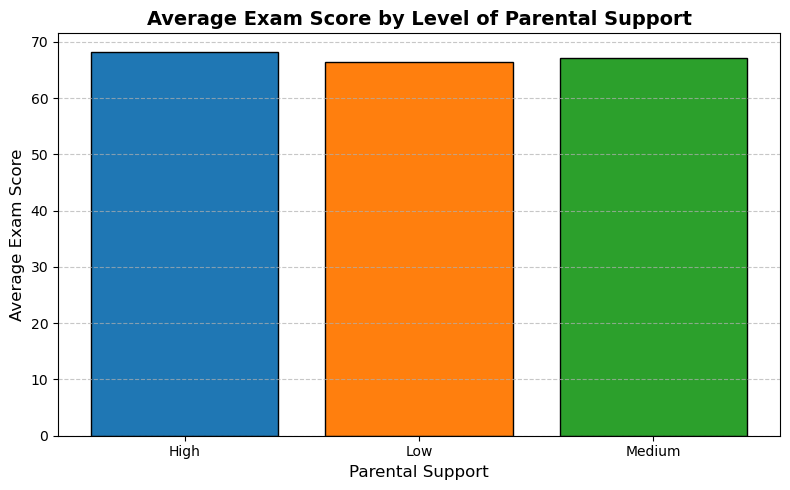

In [6]:
plt.figure(figsize=(8,5))
grouped = df.groupby('Parental_Involvement')['Exam_Score'].mean()

plt.bar(grouped.index, grouped.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'], edgecolor='black')

plt.title("Average Exam Score by Level of Parental Support", fontsize=14, fontweight='bold')
plt.xlabel("Parental Support", fontsize=12)
plt.ylabel("Average Exam Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Data spliting

In [14]:
X = df[['Hours_Studied' , 'Attendance' , 'Sleep_Hours' , 'Tutoring_Sessions' , 'Physical_Activity']]  # Feature
y = df['Exam_Score']     # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Linear Regression Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Model Performance Evaluation

In [22]:
rmse = root_mean_squared_error(y_test , y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test , y_pred)
accuracy = 100 * (1 - rmse / np.mean(y_test))

print(f"Approximate Model Accuracy: {accuracy:.2f}%")
print("Root mean squared error:" , rmse)
print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Mean Absolute Error:" , mae)

Approximate Model Accuracy: 96.50%
Root mean squared error: 2.3529944299837378
Mean Squared Error: 5.536582787534495
R² Score: 0.608308850337463
Mean Absolute Error: 1.3961401476012405


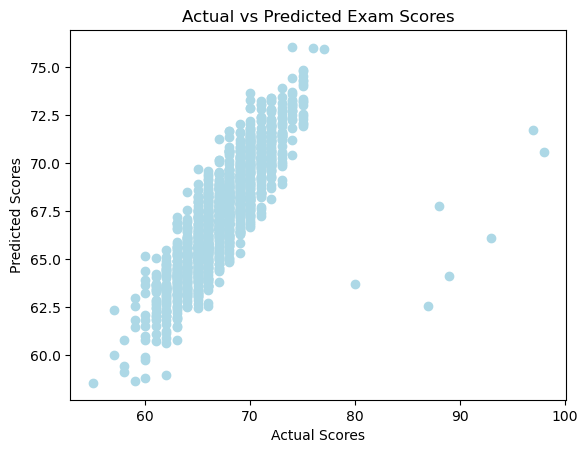

In [18]:
plt.scatter(y_test, y_pred, color='lightblue')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()
